# Milestone 2

# Introduction

Nama: Karina Maharani Utomo
<br>
Batch: 003
<br>
Hacktiv8 Full Time Data Science Program

Pada Milestone Project ini, akan digunakan Dataset HR Analytics yang dapat diakses [disini](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)

**Deskripsi dari Dataset** yang digunakan adalah sebagai berikut:
<br>
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates really want to work for the company after training and which ones are looking for a new employment, because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test. Target isn't included in test but the test target values data file is in hands for related tasks

**Features**
- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

**Objektif** dari Milestone Project ini adalah membuat model klasifikasi yang dapat memprediksi apakah seorang Data Scientist ingin tetap bekerja di perusahaan yang sekarang atau ingin mencari pekerjaan baru

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

from imblearn.over_sampling import SMOTE

%matplotlib inline

# Data Loading

In [2]:
# Loading Data

df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')

In [3]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [5]:
print('Shape data train:', df_train.shape)
print('Shape data test :', df_test.shape)

Shape data train: (19158, 14)
Shape data test : (2129, 13)


Dataset ini menyediakan dua file data. Satu untuk digunakan sebagai train data dan satunya lagi untuk test data. Terdapat 19158 baris pada train data dan 2129 baris pada test data. Dapat dilihat bahwa train data memiliki 14 kolom, sedangkan test data hanya memiliki 13. Hal ini karena pada test data tidak disertakan dengan kolom `target`. Tujuan akhir dari Milestone Project ini adalah untuk memprediksi kolom `target` pada test data tersebut

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


Features dari dataset ini terdiri dari 3 features numerik dan 10 features kategorikal

In [8]:
df_train.isnull().sum()/len(df_train)*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [9]:
df_test.isnull().sum()/len(df_test)*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

Tidak terdapat missing value pada features numerik dan terdapat 8 features kategorikal dengan missing values

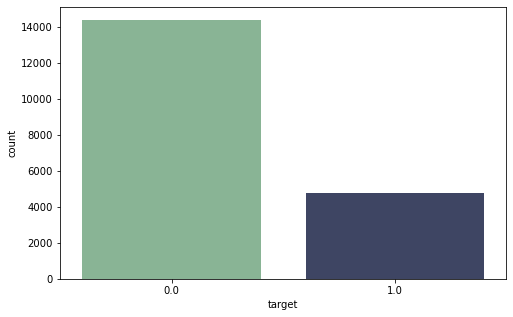

Data Scientist (DS) yang mencari pekerjaan baru      : 4777  (24.935 %)
Data Scientist (DS) yang tidak mencari pekerjaan baru: 14381 (75.065 %)


In [10]:
plt.figure(figsize = (8,5))
sns.countplot(data = df_train, x = df_train['target'], palette = ['#82BB92' ,'#384169'])
plt.show()

t1 = df_train[df_train['target'] == 1]['enrollee_id'].count()
t0 = df_train[df_train['target'] == 0]['enrollee_id'].count()
length = len(df_train)

print(f'Data Scientist (DS) yang mencari pekerjaan baru      : {t1}  ({((t1/length)*100).round(3)} %)')
print(f'Data Scientist (DS) yang tidak mencari pekerjaan baru: {t0} ({((t0/length)*100).round(3)} %)')

Dapat dilihat bahwa ini merupakan dataset yang imbalanced. Hal ini dapat memengaruhi performa model nantinya

# Data Cleaning

In [11]:
df_train.drop('enrollee_id', axis = 1, inplace = True)
df_test.drop('enrollee_id', axis = 1, inplace = True)

Diputuskan untuk menghapus kolom `enrollee_id` karena memiliki value yang bersifat unik. Lalu, sebelum proses data cleaning, akan dilakukan splitting data terlebih dahulu. Train data akan di-split menjadi dua, satu untuk model training dan satunya untuk validation. Hal ini untuk melihat apakah terjadi overfitting pada suatu model atau tidak

In [12]:
# Menseleksi features dan target

X = df_train.drop('target', axis = 1)
y = df_train['target']

In [13]:
# Splitting data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=True, stratify = y)

In [14]:
print('Jumlah baris train data     :', X_train.shape[0])
print('Jumlah baris validation data:', X_val.shape[0])
print('Jumlah baris test data      :', df_test.shape[0])

Jumlah baris train data     : 15326
Jumlah baris validation data: 3832
Jumlah baris test data      : 2129


In [15]:
print('Presentase data DS yang mencari pekerjaan baru')
print()
print('Data awal      :', '%.3f' % ((sum(df_train['target'] == 1)/len(df_train['target']))*100), '%')
print('Training data  :', '%.3f' % ((sum(y_train == 1)/len(y_train))*100), '%')
print('Validation data:', '%.3f' % ((sum(y_val == 1)/len(y_val))*100), '%')

Presentase data DS yang mencari pekerjaan baru

Data awal      : 24.935 %
Training data  : 24.938 %
Validation data: 24.922 %


Dapat dilihat bahwa presentase data DS (Data Scientist) yang mencari pekerjaan baru pada train dan validation data sama dengan presentase pada data awal. Ini untuk memastikan bahwa data tersebar secara merata pada saat splitting data

Untuk proses data cleaning, akan dilakukan pada train terlebih dahulu. Apa yang dilakukan pada train data nantinya akan diimplementasikan pada validation data dan test data

## Train Data

Untuk proses cleaning, X_train dan y_train akan digabungkan terlebih dahulu

In [16]:
data_train = pd.concat([X_train, y_train], axis = 1)
data_train

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1435,city_103,0.920,Female,No relevent experience,no_enrollment,Graduate,STEM,1,NaN,NaN,1,23,1.0
12211,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,NaN,8,100-500,Pvt Ltd,>4,111,0.0
201,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,2,500-999,Public Sector,1,39,0.0
18835,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Arts,5,NaN,NaN,never,101,0.0
10134,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,50-99,Pvt Ltd,1,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,Other,4,1000-4999,Pvt Ltd,2,6,0.0
15989,city_70,0.698,Female,No relevent experience,no_enrollment,Graduate,Humanities,<1,NaN,NaN,1,52,1.0
14578,city_123,0.738,Male,Has relevent experience,Full time course,Graduate,STEM,10,10000+,Pvt Ltd,1,144,0.0
10659,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,6,NaN,NaN,2,42,0.0


In [17]:
# Melihat jumlah missing value pada masing-masing kolom

data_train.isnull().sum()

city                         0
city_development_index       0
gender                    3579
relevent_experience          0
enrolled_university        305
education_level            369
major_discipline          2238
experience                  50
company_size              4711
company_type              4903
last_new_job               334
training_hours               0
target                       0
dtype: int64

In [18]:
# Melihat presentase dari missing value

data_train.isnull().sum()/len(X_train)*100

city                       0.000000
city_development_index     0.000000
gender                    23.352473
relevent_experience        0.000000
enrolled_university        1.990082
education_level            2.407673
major_discipline          14.602636
experience                 0.326243
company_size              30.738614
company_type              31.991387
last_new_job               2.179303
training_hours             0.000000
target                     0.000000
dtype: float64

In [19]:
# Menampilkan unique values dari masing-masing kolom yang memiliki missing value

missing_col = data_train[['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 
                    'company_size', 'company_type', 'last_new_job']]

for col in missing_col:
    print(col)
    print(missing_col[col].unique())
    print()

gender
['Female' 'Male' 'Other' nan]

enrolled_university
['no_enrollment' 'Full time course' 'Part time course' nan]

education_level
['Graduate' 'High School' nan 'Primary School' 'Masters' 'Phd']

major_discipline
['STEM' nan 'Arts' 'Business Degree' 'Humanities' 'Other' 'No Major']

experience
['1' '8' '2' '5' '12' '>20' '9' '13' '4' '3' '20' '7' '6' '15' '11' '18'
 '16' '10' '14' '<1' nan '17' '19']

company_size
[nan '100-500' '500-999' '50-99' '10/49' '10000+' '<10' '5000-9999'
 '1000-4999']

company_type
[nan 'Pvt Ltd' 'Public Sector' 'NGO' 'Funded Startup'
 'Early Stage Startup' 'Other']

last_new_job
['1' '>4' 'never' nan '2' '3' '4']



Berikut adalah metode yang akan dipakai untuk proses handling missing value pada masing-masing kolom:
1. Missing value pada kolom `gender`, akan diisi dengan value 'Unknown' karena dalam kasus ini, sulit untuk memperkirakan gender seseorang dengan akurat. Selain itu, karena missing value dari kolom ini cukup besar (23.35%), kesalahan dalam proses imputing missing value dapat memengaruhi insight yang didapat dari data
2. Missing value pada kolom `enrolled_university` dan `experience`, diputuskan untuk dihapus karena missing value pada kedua kolom tersebut memiliki presentase yang kecil
3. Missing value pada kolom `education_level` dan `last_new_job` akan diisi dengan modus dari masing-masing kolom
4. Missing value pada kolom `major_discipline` akan diisi berdasarkan value pada kolom `education_level`
    - Apabila pendidikan terakhir berupa 'High School' atau 'Primary School', maka kolom jurusan akan diisi dengan 'No Major' karena orang tersebut tidak kuliah
    - Apabila pendidikan terakhir berupa 'Graduate', 'Masters', atau 'Phd', maka kolom jurusan akan diisi dengan 'Other' dengan asumsi jurusan mereka tidak termasuk dalam kategori STEM, Arts, Business Degree, atau Humanities
5. Missing value pada kolom `company_size` dan `company_type` akan diisi dengan 'Unknown', dengan alasan yang sama dengan kolom `Gender`. Selain itu, value '10/49' pada kolom `company_size` akan diganti dengan '10-49'

In [20]:
train_imp = data_train.copy()

1. Imputing missing value kolom `gender`

In [21]:
train_imp['gender'].fillna('Unknown',inplace=True)

2. Dropping missing value kolom `enrolled_university` dan `experience`

In [22]:
train_imp.dropna(subset = ['enrolled_university', 'experience'], inplace = True)

In [23]:
print('Data train di awal                   :', len(data_train))
print('Data train setelah drop missing value:', len(train_imp))
print()
print(f'Data berkurang sebanyak {round((((len(data_train)-len(train_imp))/len(data_train))*100), 3)}%')

Data train di awal                   : 15326
Data train setelah drop missing value: 14975

Data berkurang sebanyak 2.29%


3. Imputing missing value kolom `education_level` dan `last_new_job`

In [24]:
print('Modus kolom education level:\n', train_imp['education_level'].mode())
print()
print('Modus kolom last new job:\n', train_imp['last_new_job'].mode())

Modus kolom education level:
 0    Graduate
dtype: object

Modus kolom last new job:
 0    1
dtype: object


In [25]:
train_imp['education_level'].fillna('Graduate',inplace=True)
train_imp['last_new_job'].fillna('1',inplace=True)

4. Imputing missing value kolom `major_discipline`

In [26]:
major_null = train_imp['major_discipline'].isnull()

# Membuat dictionary untuk mengisi missing value dengan No Major apabila education_level berupa High School atau Primary School
mapping_dict = dict({'High School': 'No Major', 
                     'Primary School': 'No Major'})

# Mengisi missing value sesuai dictionary
train_imp.loc[major_null, 'major_discipline'] = train_imp.loc[major_null, 'education_level'].map(mapping_dict)

# Mengisi missing value lainnya dengan Other
train_imp['major_discipline'] = train_imp['major_discipline'].fillna('Other')

5. Imputing missing value kolom `company_size` dan `company_type`

In [27]:
train_imp['company_size'] = train_imp['company_size'].replace(['10/49'], '10-49')

In [28]:
train_imp['company_size'].fillna('Unknown',inplace=True)
train_imp['company_type'].fillna('Unknown',inplace=True)

In [29]:
# Menampilkan kembali train data setelah proses missing value handling

train_imp.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1435,city_103,0.920,Female,No relevent experience,no_enrollment,Graduate,STEM,1,Unknown,Unknown,1,23,1.0
12211,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,No Major,8,100-500,Pvt Ltd,>4,111,0.0
201,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,2,500-999,Public Sector,1,39,0.0
18835,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Arts,5,Unknown,Unknown,never,101,0.0
10134,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,50-99,Pvt Ltd,1,6,0.0


In [30]:
objects = train_imp[['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 
                       'experience', 'company_size', 'company_type', 'last_new_job']]

for col in objects:
    print(col)
    print(objects[col].unique())
    print()

gender
['Female' 'Male' 'Other' 'Unknown']

relevent_experience
['No relevent experience' 'Has relevent experience']

enrolled_university
['no_enrollment' 'Full time course' 'Part time course']

education_level
['Graduate' 'High School' 'Primary School' 'Masters' 'Phd']

major_discipline
['STEM' 'No Major' 'Arts' 'Other' 'Business Degree' 'Humanities']

experience
['1' '8' '2' '5' '12' '>20' '9' '13' '4' '3' '20' '7' '6' '15' '11' '18'
 '16' '10' '14' '<1' '17' '19']

company_size
['Unknown' '100-500' '500-999' '50-99' '10-49' '10000+' '<10' '5000-9999'
 '1000-4999']

company_type
['Unknown' 'Pvt Ltd' 'Public Sector' 'NGO' 'Funded Startup'
 'Early Stage Startup' 'Other']

last_new_job
['1' '>4' 'never' '2' '3' '4']



In [31]:
train_imp.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Dapat dilihat bahwa sekarang sudah tidak ada missing values pada kolom-kolom kategorikal. Untuk mempermudah proses cleaning validation dan test data, apa yang sudah dilakukan pada train data akan dimasukkan ke dalam function

In [32]:
def cleaning(data):
    data['gender'].fillna('Unknown',inplace=True)
    data.dropna(subset = ['enrolled_university', 'experience'], inplace = True)
    
    data['education_level'].fillna('Graduate',inplace=True)
    data['last_new_job'].fillna('1',inplace=True)

    major_null = data['major_discipline'].isnull()
    mapping_dict = dict({'High School': 'No Major',
                         'Primary School': 'No Major'})
    data.loc[major_null, 'major_discipline'] = data.loc[major_null, 'education_level'].map(mapping_dict)
    data['major_discipline'] = data['major_discipline'].fillna('Other')

    data['company_size'] = data['company_size'].replace(['10/49'], '10-49')
    data['company_size'].fillna('Unknown',inplace=True)
    data['company_type'].fillna('Unknown',inplace=True)
    
    return(data)

## Validation Data

Sama halnya yang sudah dilakukan pada train data, X_val dan y_val akan digabung terlebih dahulu untuk proses cleaning

In [33]:
data_val = pd.concat([X_val, y_val], axis = 1)
data_val

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
3723,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,<10,Pvt Ltd,1,90,0.0
2425,city_67,0.855,Female,No relevent experience,Full time course,Masters,STEM,11,NaN,NaN,>4,78,0.0
2929,city_98,0.949,Male,Has relevent experience,no_enrollment,Masters,Other,>20,500-999,Pvt Ltd,2,14,0.0
15665,city_114,0.926,Female,Has relevent experience,no_enrollment,Masters,Humanities,2,<10,NGO,1,33,1.0
1271,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,3,<10,Pvt Ltd,1,332,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16864,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,50-99,Funded Startup,4,43,0.0
5459,city_74,0.579,Male,No relevent experience,Part time course,Graduate,STEM,3,NaN,NaN,never,47,1.0
18582,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,10,50-99,Public Sector,1,10,1.0
8437,city_46,0.762,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,NGO,1,22,0.0


In [34]:
# Melihat jumlah missing value pada masing-masing kolom

data_val.isnull().sum()

city                         0
city_development_index       0
gender                     929
relevent_experience          0
enrolled_university         81
education_level             91
major_discipline           575
experience                  15
company_size              1227
company_type              1237
last_new_job                89
training_hours               0
target                       0
dtype: int64

In [35]:
# Melihat presentase missing value

data_val.isnull().sum()/len(X_train)*100

city                      0.000000
city_development_index    0.000000
gender                    6.061595
relevent_experience       0.000000
enrolled_university       0.528514
education_level           0.593762
major_discipline          3.751794
experience                0.097873
company_size              8.006003
company_type              8.071251
last_new_job              0.580713
training_hours            0.000000
target                    0.000000
dtype: float64

In [36]:
val_imp = data_val.copy()

In [37]:
# Handling missing value pada validation data

cleaning(val_imp)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
3723,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,<10,Pvt Ltd,1,90,0.0
2425,city_67,0.855,Female,No relevent experience,Full time course,Masters,STEM,11,Unknown,Unknown,>4,78,0.0
2929,city_98,0.949,Male,Has relevent experience,no_enrollment,Masters,Other,>20,500-999,Pvt Ltd,2,14,0.0
15665,city_114,0.926,Female,Has relevent experience,no_enrollment,Masters,Humanities,2,<10,NGO,1,33,1.0
1271,city_21,0.624,Unknown,Has relevent experience,no_enrollment,Graduate,STEM,3,<10,Pvt Ltd,1,332,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16864,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,50-99,Funded Startup,4,43,0.0
5459,city_74,0.579,Male,No relevent experience,Part time course,Graduate,STEM,3,Unknown,Unknown,never,47,1.0
18582,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,10,50-99,Public Sector,1,10,1.0
8437,city_46,0.762,Unknown,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,NGO,1,22,0.0


In [38]:
val_imp.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Dapat dilihat bahwa validation data sudah tidak memiliki missing value

# Data Exploration

Untuk Data Exploration, akan digunakan train data

In [39]:
train_imp.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1435,city_103,0.920,Female,No relevent experience,no_enrollment,Graduate,STEM,1,Unknown,Unknown,1,23,1.0
12211,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,No Major,8,100-500,Pvt Ltd,>4,111,0.0
201,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,2,500-999,Public Sector,1,39,0.0
18835,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Arts,5,Unknown,Unknown,never,101,0.0
10134,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,50-99,Pvt Ltd,1,6,0.0


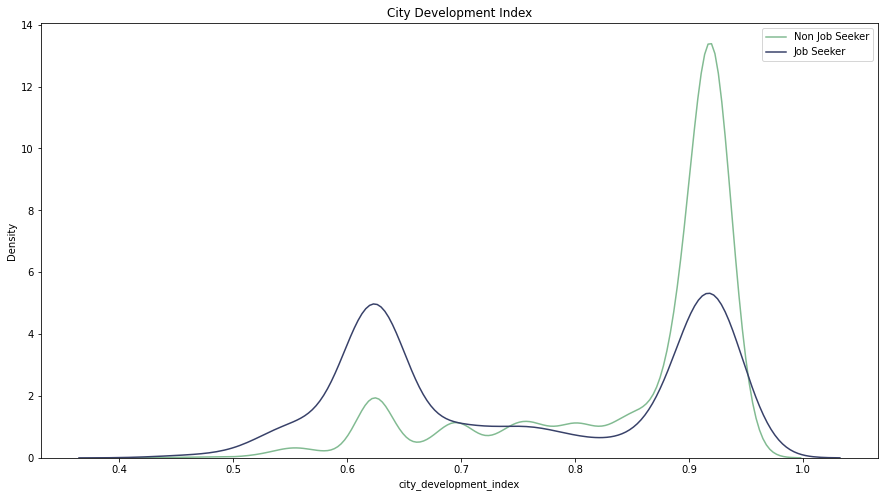

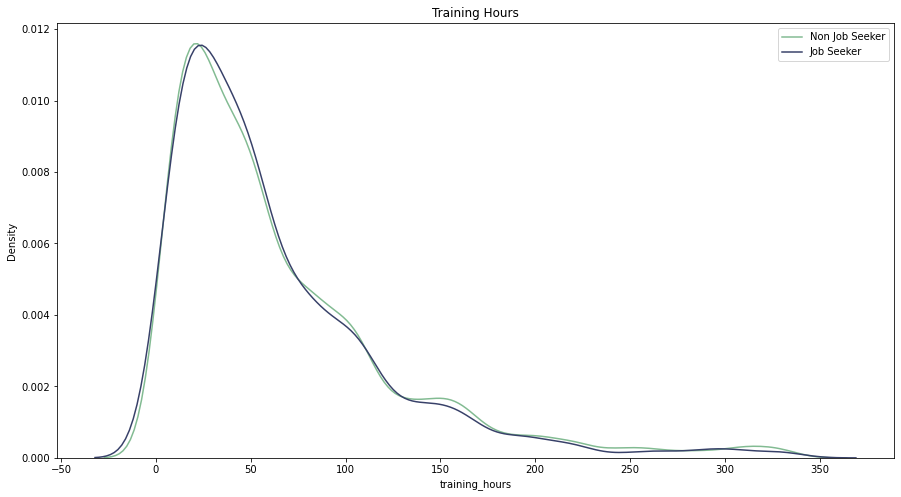

In [40]:
plt.figure(figsize = (15,8))
sns.kdeplot(train_imp.loc[(train_imp['target'] == 0), 'city_development_index'], color = '#82BB92', label = 'Non Job Seeker')
sns.kdeplot(train_imp.loc[(train_imp['target'] == 1), 'city_development_index'], color = '#384169', label = 'Job Seeker')
plt.title('City Development Index')
plt.legend()

plt.figure(figsize = (15,8))
sns.kdeplot(train_imp.loc[(train_imp['target'] == 0), 'training_hours'], color = '#82BB92', label = 'Non Job Seeker')
sns.kdeplot(train_imp.loc[(train_imp['target'] == 1), 'training_hours'], color = '#384169', label = 'Job Seeker')
plt.title('Training Hours')
plt.legend()

plt.show()

Dari plot City Development Index (CDI), dapat dilihat bahwa terdapat dua puncak untuk Data Scientist yang mencari pekerjaan baru, yaitu yang berasal dari kota dengan CDI rendah dan kota dengan CDI tinggi
- Untuk Data Scientist di kota dengan CDI rendah, mungkin mereka ingin mencari pekerjaan baru dengan penghasilan yang lebih baik
- Untuk Data Scientist di kota dengan CDI tinggi, mungkin terdapat banyak pilihan tempat kerja yang dapat mereka explore

Dari plot Training Hours, tidak terlihat ada perbedaan yang signifikan antara Data Scientist yang mencari pekerjaan baru dan yang tidak

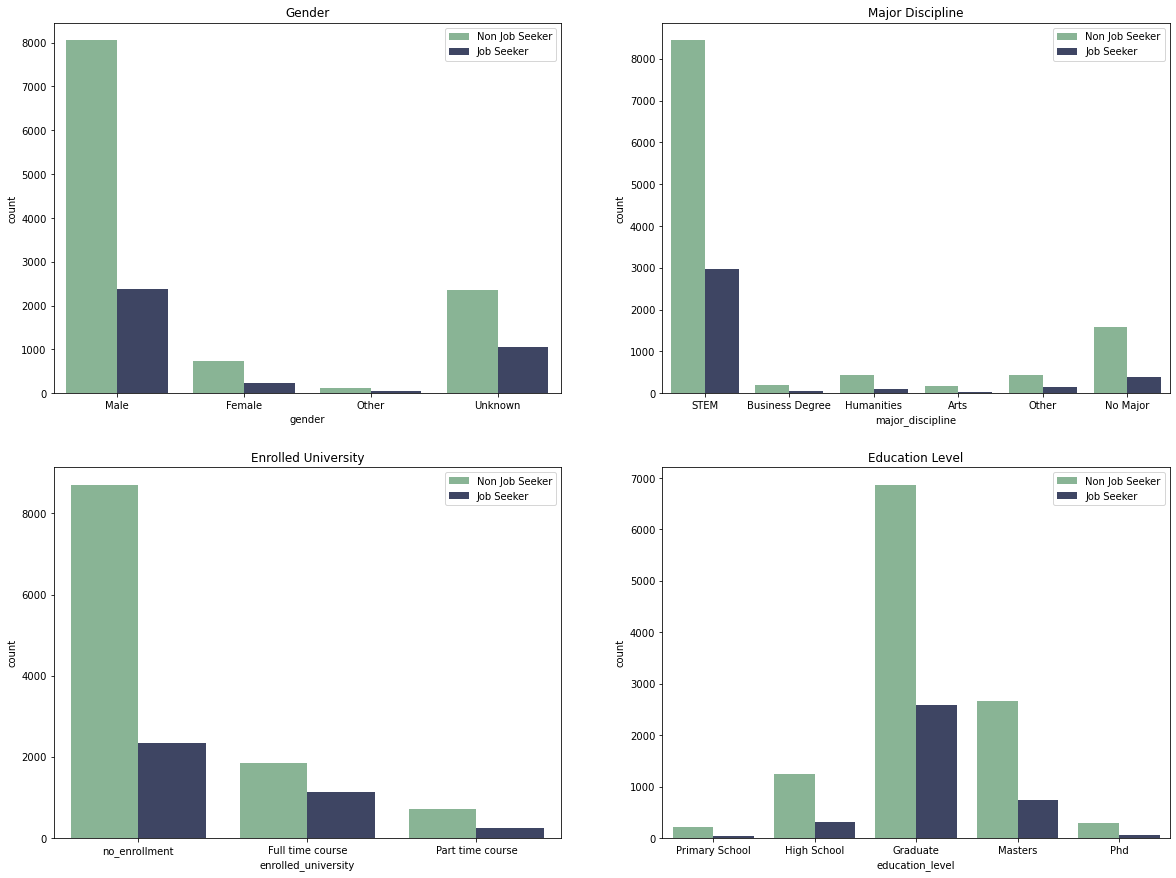

In [41]:
fig = plt.figure(figsize=(20,15))
row = 2
col = 2

fig.add_subplot(row, col, 1)
sns.countplot(x = train_imp['gender'], hue = train_imp['target'], order = ['Male', 'Female', 'Other', 'Unknown'], palette = ['#82BB92' ,'#384169'])
plt.legend(['Non Job Seeker', 'Job Seeker'])
plt.title('Gender')

fig.add_subplot(row, col, 2)
sns.countplot(x = train_imp['major_discipline'], hue = train_imp['target'], order = ['STEM', 'Business Degree', 'Humanities', 'Arts', 'Other', 'No Major'], palette = ['#82BB92' ,'#384169'])
plt.legend(['Non Job Seeker', 'Job Seeker'])
plt.title('Major Discipline')

fig.add_subplot(row, col, 3)
sns.countplot(x = train_imp['enrolled_university'], hue = train_imp['target'], palette = ['#82BB92' ,'#384169'])
plt.legend(['Non Job Seeker', 'Job Seeker'])
plt.title('Enrolled University')

fig.add_subplot(row, col, 4)
sns.countplot(x = train_imp['education_level'], hue = train_imp['target'], order = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'], palette = ['#82BB92' ,'#384169'])
plt.legend(['Non Job Seeker', 'Job Seeker'])
plt.title('Education Level')

plt.show()

Dari plot Major Discipline, terlihat bahwa dataset ini didominasi oleh orang-orang dari jurusan STEM (Science, Technology, Engineering and Mathematics). Hal ini bersesuaian dengan bidang pekerjaannya karena Data Science memiliki basis ilmu Matematika yang kuat

Didapat juga bahwa Data Scientist yang mencari pekerjaan baru paling banyak yang:
- Berjenis kelamin pria
- Berasal dari jurusan STEM
- Tidak daftar course university
- Lulusan S1

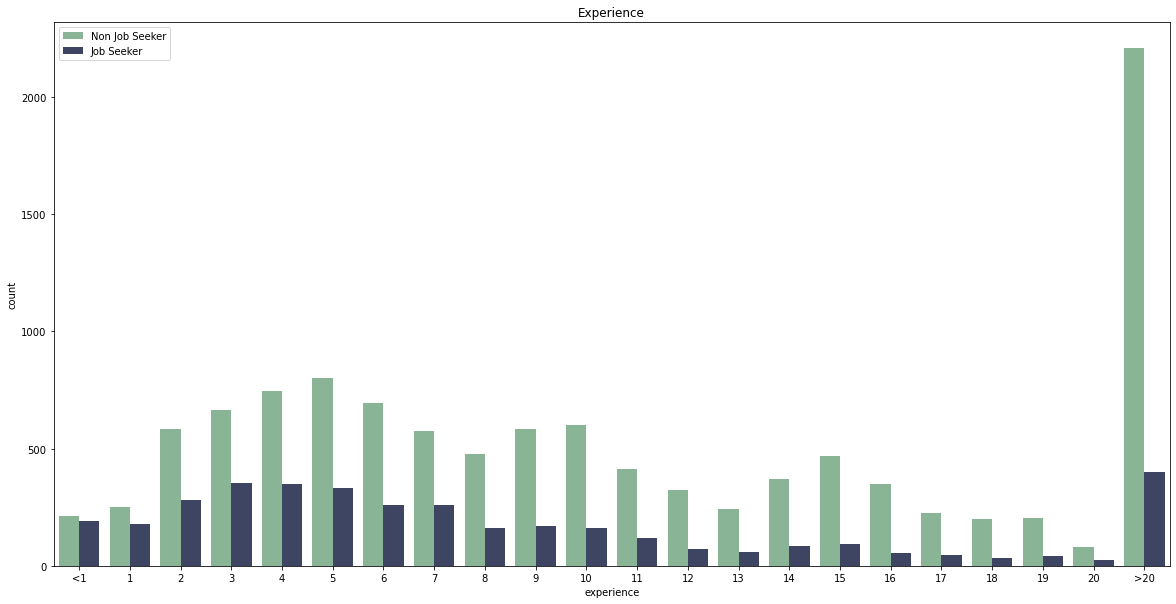

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(x = train_imp['experience'], hue = train_imp['target'], order = ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20'], palette = ['#82BB92' ,'#384169'])
plt.legend(['Non Job Seeker', 'Job Seeker'])
plt.title('Experience')

plt.show()

Dari plot experience, terlihat bahwa Data Scientist yang mencari pekerjaan baru mayoritas memiliki pengalaman selama 7 tahun ke bawah. Hal ini mungkin karena orang-orang tersebut ingin mencari banyak pengalaman baru untuk meningkatkan skill mereka

Text(0.5, 1.0, 'Relevent Experience')

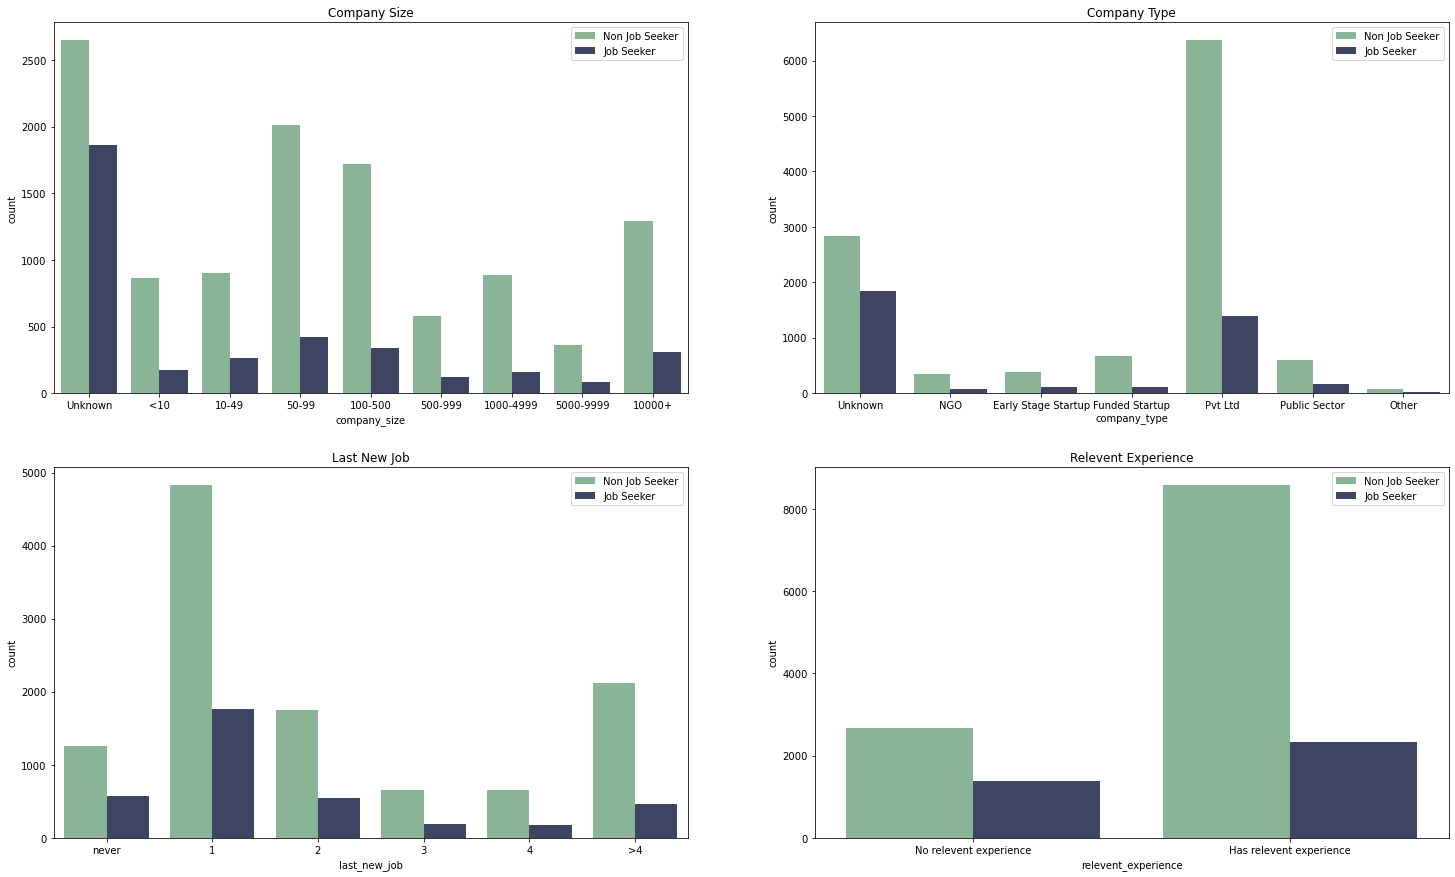

In [43]:
fig = plt.figure(figsize=(25,15))
row = 2
col = 2

fig.add_subplot(row, col, 1)
sns.countplot(x = train_imp['company_size'], hue = train_imp['target'], order = ['Unknown', '<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'], palette = ['#82BB92' ,'#384169'])
plt.legend(['Non Job Seeker', 'Job Seeker'])
plt.title('Company Size')

fig.add_subplot(row, col, 2)
sns.countplot(x = train_imp['company_type'], hue = train_imp['target'], order = ['Unknown', 'NGO', 'Early Stage Startup', 'Funded Startup', 'Pvt Ltd', 'Public Sector', 'Other'], palette = ['#82BB92' ,'#384169'])
plt.legend(['Non Job Seeker', 'Job Seeker'])
plt.title('Company Type')

fig.add_subplot(row, col, 3)
sns.countplot(x = train_imp['last_new_job'], hue = train_imp['target'], order = ['never', '1', '2', '3', '4', '>4'], palette = ['#82BB92' ,'#384169'])
plt.legend(['Non Job Seeker', 'Job Seeker'])
plt.title('Last New Job')

fig.add_subplot(row, col, 4)
sns.countplot(x = train_imp['relevent_experience'], hue = train_imp['target'], palette = ['#82BB92' ,'#384169'])
plt.legend(['Non Job Seeker', 'Job Seeker'])
plt.title('Relevent Experience')

Untuk Company Size, karena data Data Scientist yang mencari pekerjaan baru didominasi oleh data Unknown, perlu data yang lebih banyak untuk meninjau kolom tersebut. Sama halnya dengan Company Type

Dari plot Last New Job, dapat dilihat bahwa Data Scientist yang mencari pekerjaan baru paling banyak merupakan DS yang baru ganti pekerjaan setahun sebelumnya. Hal ini mungkin dikarenakan belum menemukan tempat yang cocok untuk mereka. Data kedua terbanyak adalah dari DS yang belum pernah ganti pekerjaan sebelumnya. Hal ini mungkin karena mereka ingin mencari tantangan baru

Didapat juga bahwa Data Scientist yang mencari pekerjaan baru paling bahwa memiliki pengalaman yang relevan

Selanjutnya, akan dibuat heatmap untuk melihat korelasi antar kolom. Data kategorikal perlu diubah dalam bentuk numerik terlebih dahulu agar heatmap lebih enak dilihat

In [44]:
# Membuat dictionary untuk encode kolom kategorikal

gen_map = {
    'Unknown': 0, 
    'Male': 1, 
    'Female': 2, 
    'Other':3
}

rexp_map = {
    'No relevent experience': 0,
    'Has relevent experience': 1
}

euni_map = {
    'no_enrollment': 0,
    'Part time course': 1, 
    'Full time course': 2 
}
    
edu_map = {
    'Primary School': 0,
    'High School': 1,
    'Graduate': 2,
    'Masters': 3,  
    'Phd': 4
    } 
    
major_map ={ 
    'No Major': 0,
    'Other': 1, 
    'Arts': 2, 
    'Humanities': 3, 
    'Business Degree': 4, 
    'STEM': 5 
}
    
exp_map = {
    '<1': 0,
    '1': 1, 
    '2': 2, 
    '3': 3, 
    '4': 4, 
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8, 
    '9': 9, 
    '10': 10, 
    '11': 11,
    '12': 12,
    '13': 13, 
    '14': 14, 
    '15': 15, 
    '16': 16,
    '17': 17,
    '18': 18,
    '19': 19, 
    '20': 20, 
    '>20':21
} 

csize_map = {
    'Unknown': 0,
    '<10': 1,
    '10-49': 2, 
    '50-99': 3,
    '100-500': 4, 
    '500-999': 5,
    '1000-4999': 6,  
    '5000-9999': 7,
    '10000+': 8
}
    
ctype_map = {
    'Unknown': 0,
    'NGO': 1,
    'Early Stage Startup': 2, 
    'Funded Startup': 3, 
    'Pvt Ltd': 4, 
    'Public Sector': 5, 
    'Other': 6
}
    
lastjob_map = {
    'never': 0,
    '1': 1, 
    '2': 2, 
    '3': 3, 
    '4': 4, 
    '>4': 5
}

In [45]:
train_trf = train_imp.copy()

In [46]:
# Encoding kolom kategorikal

train_trf.loc[:,'gender'] = train_trf['gender'].map(gen_map)
train_trf.loc[:,'relevent_experience'] = train_trf['relevent_experience'].map(rexp_map)
train_trf.loc[:,'enrolled_university'] = train_trf['enrolled_university'].map(euni_map)
train_trf.loc[:,'education_level'] = train_trf['education_level'].map(edu_map)
train_trf.loc[:,'major_discipline'] = train_trf['major_discipline'].map(major_map)
train_trf.loc[:,'experience'] = train_trf['experience'].map(exp_map)
train_trf.loc[:,'company_size'] = train_trf['company_size'].map(csize_map)
train_trf.loc[:,'company_type'] = train_trf['company_type'].map(ctype_map)
train_trf.loc[:,'last_new_job'] = train_trf['last_new_job'].map(lastjob_map)

# Kolom City akan di-encode menggunakan LabelEncoder
lb_en = LabelEncoder()
train_trf.loc[:,'city'] = lb_en.fit_transform(train_trf.loc[:,'city']) 

In [47]:
train_trf

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1435,5,0.920,2,0,0,2,5,1,0,0,1,23,1.0
12211,48,0.910,1,1,0,1,0,8,4,4,5,111,0.0
201,64,0.624,1,0,0,2,5,2,5,5,1,39,0.0
18835,5,0.920,1,1,0,2,2,5,0,0,0,101,0.0
10134,64,0.624,1,1,0,2,5,12,3,4,1,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344,91,0.913,1,1,0,2,1,4,6,4,2,6,0.0
15989,98,0.698,2,0,0,2,3,0,0,0,1,52,1.0
14578,21,0.738,1,1,2,2,5,10,8,4,1,144,0.0
10659,5,0.920,1,0,2,2,5,6,0,0,2,42,0.0


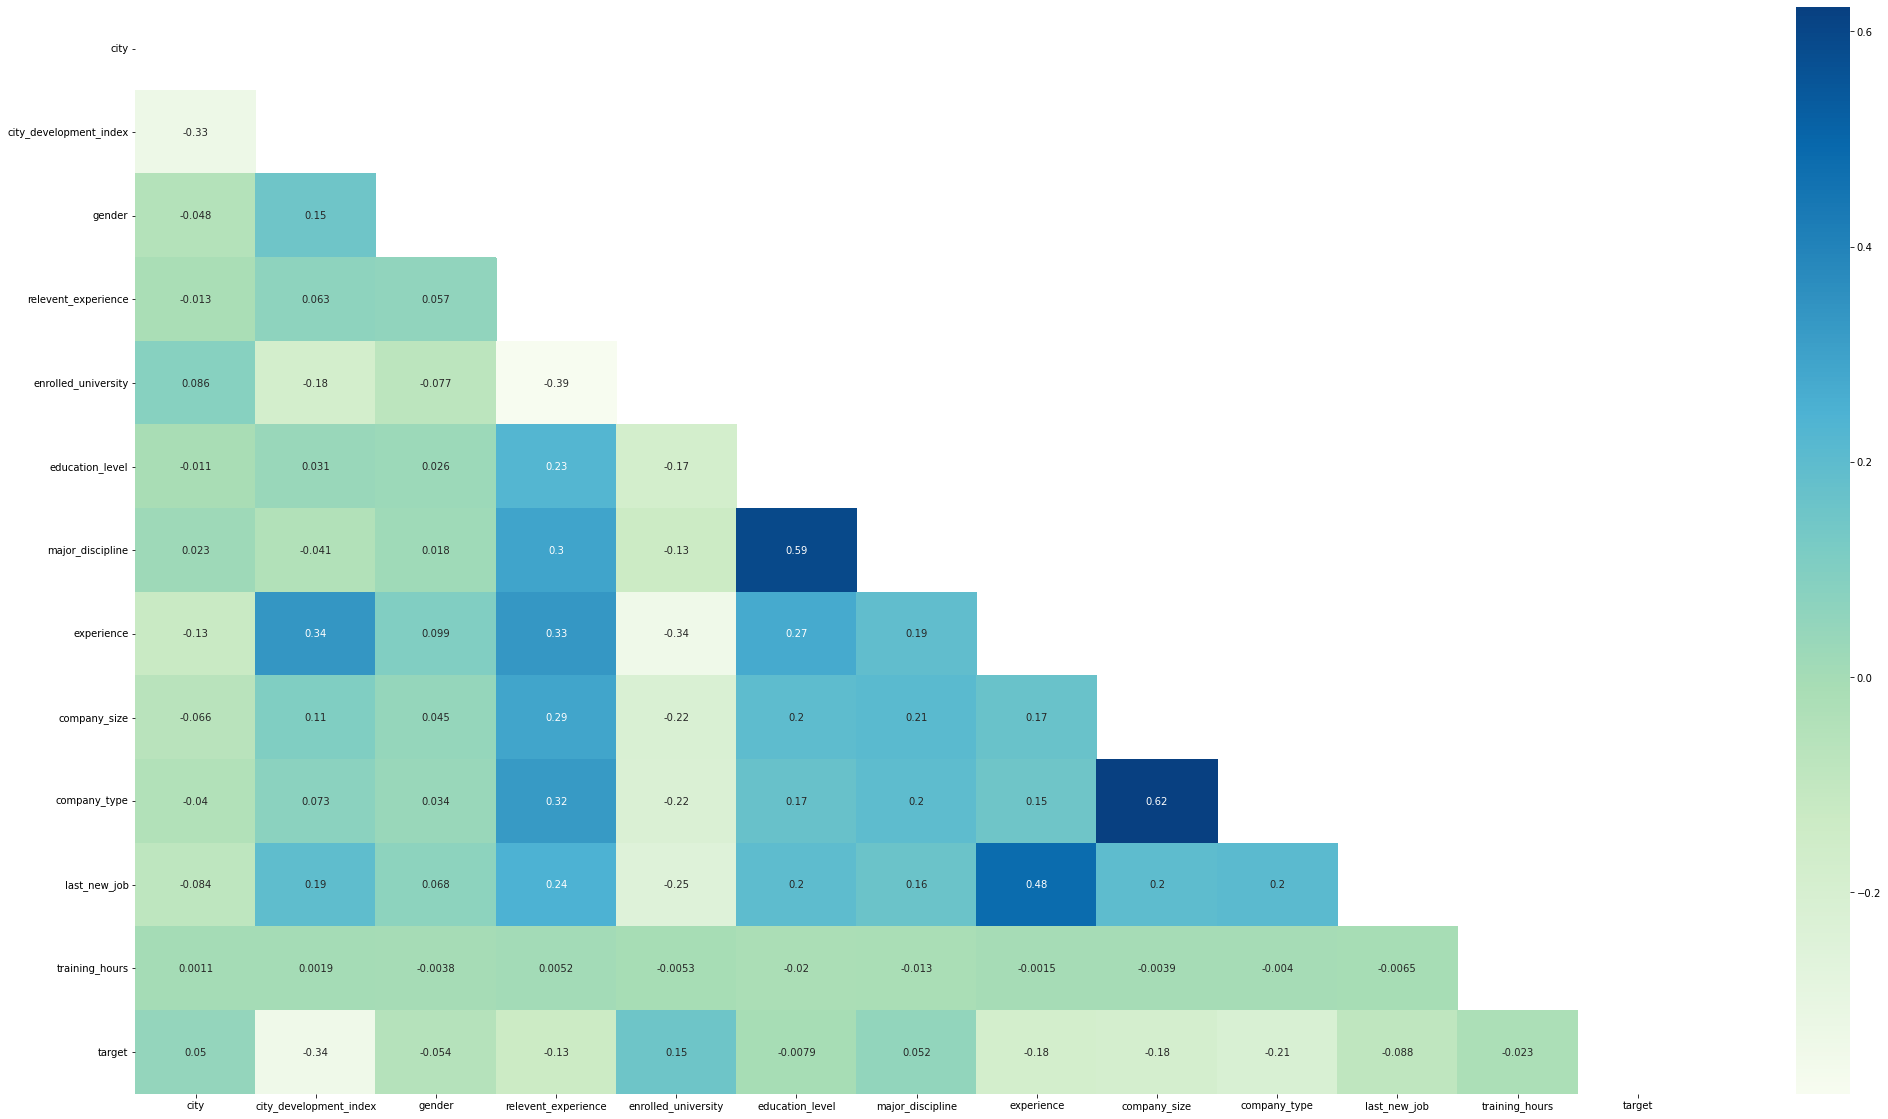

In [48]:
plt.figure(figsize = (35,20))
sns.heatmap(train_trf.corr(), annot = True, cmap = 'GnBu', mask = np.triu(train_trf.corr()))

plt.show()

Dari heatmap, dapat dilihat bahwa kolom `enrolled_university` memiliki korelasi positif paling besar dengan kolom `target`. Sedangkan kolom `city_development_index` memiliki korelasi negatif paling besar dengan kolom `target`

# Data Preprocessing

Untuk Data Preprocessing:
- Untuk kolom-kolom kategorikal dengan banyak unique values, seperti `experience`, `company_size`, dan `city`, akan dilakukan encoding ke dalam bentuk numerik
- Untuk kolom kategorikal lainnya, akan di-encode menggunakan OneHotEncoder
- Untuk kolom numerik, akan dilakukan features scaling dengan StandardScaler

## Train Data

In [49]:
train_model = train_imp.copy()
train_model.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1435,city_103,0.920,Female,No relevent experience,no_enrollment,Graduate,STEM,1,Unknown,Unknown,1,23,1.0
12211,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,No Major,8,100-500,Pvt Ltd,>4,111,0.0
201,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,2,500-999,Public Sector,1,39,0.0
18835,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Arts,5,Unknown,Unknown,never,101,0.0
10134,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,50-99,Pvt Ltd,1,6,0.0


In [50]:
# Encoding value kolom experience, company_size, dan city menjadi numerik

train_model.loc[:,'experience'] = train_model['experience'].map(exp_map)
train_model.loc[:,'company_size'] = train_model['company_size'].map(csize_map)
train_model.loc[:,'city'] = lb_en.fit_transform(train_model.loc[:,'city']) 

In [51]:
train_model.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1435,5,0.920,Female,No relevent experience,no_enrollment,Graduate,STEM,1,0,Unknown,1,23,1.0
12211,48,0.910,Male,Has relevent experience,no_enrollment,High School,No Major,8,4,Pvt Ltd,>4,111,0.0
201,64,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,2,5,Public Sector,1,39,0.0
18835,5,0.920,Male,Has relevent experience,no_enrollment,Graduate,Arts,5,0,Unknown,never,101,0.0
10134,64,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,3,Pvt Ltd,1,6,0.0


In [52]:
# Mendefinisikan features dan target

X_train = train_model.drop('target', axis = 1)
y_train = train_model['target']

In [53]:
# Melihat kolom numerik

numbers = X_train.select_dtypes(include=['int64', 'float64']).copy()
numbers.columns

Index(['city', 'city_development_index', 'experience', 'company_size',
       'training_hours'],
      dtype='object')

In [54]:
# Melihat kolom kategorikal

objects = X_train.select_dtypes(include=['object']).copy()
objects.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_type', 'last_new_job'],
      dtype='object')

Untuk mempermudah proses encoding dan scaling, akan dibuat pipeline yang dapat melakukan preprocessing kepada kolom numerik dan juga kategorikal

In [55]:
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [56]:
# Membuat pipeline untuk kolom numerik
numerical_pipeline = Pipeline([
    ("select_numeric", OldDataFrameSelector(['city', 'city_development_index', 'experience', 'company_size',
       'training_hours'])),
    ("std_scaler", StandardScaler()),
])

# Membuat pipeline untuk kolom kategorikal
categorical_pipeline = Pipeline([
    ("select_cat", OldDataFrameSelector(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_type', 'last_new_job'])),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

# Menggabungkan kedua pipelines
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [57]:
X_train_trf = preprocess_pipeline.fit_transform(X_train)
X_train_trf

array([[-1.10015856,  0.73732633, -1.35217551, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1119796 ,  0.65601032, -0.31920755, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56300775, -1.66962754, -1.20460866, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.64913041, -0.74262504, -0.02407384, ...,  0.        ,
         0.        ,  0.        ],
       [-1.10015856,  0.73732633, -0.61434125, ...,  0.        ,
         0.        ,  0.        ],
       [-1.10015856,  0.73732633, -0.7619081 , ...,  0.        ,
         0.        ,  0.        ]])

Langkah preprocessing di luar pipeline akan dimasukkan ke dalam function

In [58]:
def preprocessing(data):
    data.loc[:,'experience'] = data['experience'].map(exp_map)
    data.loc[:,'company_size'] = data['company_size'].map(csize_map)
    data.loc[:,'city'] = lb_en.transform(data.loc[:,'city']) 
    return (data)

## Validation Data

In [59]:
val_model = val_imp.copy()
val_model.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
3723,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,<10,Pvt Ltd,1,90,0.0
2425,city_67,0.855,Female,No relevent experience,Full time course,Masters,STEM,11,Unknown,Unknown,>4,78,0.0
2929,city_98,0.949,Male,Has relevent experience,no_enrollment,Masters,Other,>20,500-999,Pvt Ltd,2,14,0.0
15665,city_114,0.926,Female,Has relevent experience,no_enrollment,Masters,Humanities,2,<10,NGO,1,33,1.0
1271,city_21,0.624,Unknown,Has relevent experience,no_enrollment,Graduate,STEM,3,<10,Pvt Ltd,1,332,0.0


In [60]:
# Encoding value kolom experience, company_size, dan city menjadi numerik

preprocessing(val_model)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
3723,95,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,1,Pvt Ltd,1,90,0.0
2425,95,0.855,Female,No relevent experience,Full time course,Masters,STEM,11,0,Unknown,>4,78,0.0
2929,121,0.949,Male,Has relevent experience,no_enrollment,Masters,Other,21,5,Pvt Ltd,2,14,0.0
15665,13,0.926,Female,Has relevent experience,no_enrollment,Masters,Humanities,2,1,NGO,1,33,1.0
1271,64,0.624,Unknown,Has relevent experience,no_enrollment,Graduate,STEM,3,1,Pvt Ltd,1,332,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16864,5,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,3,Funded Startup,4,43,0.0
5459,102,0.579,Male,No relevent experience,Part time course,Graduate,STEM,3,0,Unknown,never,47,1.0
18582,5,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,10,3,Public Sector,1,10,1.0
8437,83,0.762,Unknown,Has relevent experience,no_enrollment,Graduate,STEM,6,3,NGO,1,22,0.0


In [61]:
X_val = val_model.drop('target', axis = 1)
y_val = val_model['target']

In [62]:
# Encoding dan scaling dengan pipeline

X_val_trf = preprocess_pipeline.transform(X_val)
X_val_trf

array([[ 1.43687479,  0.20877227,  0.86132727, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.43687479,  0.20877227,  0.12349301, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.16979554,  0.97314276,  1.59916153, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.10015856,  0.73732633, -0.02407384, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.09860368, -0.54746662, -0.61434125, ...,  0.        ,
         0.        ,  0.        ],
       [-1.10015856,  0.73732633,  0.12349301, ...,  0.        ,
         0.        ,  0.        ]])

## Hyperparameter Tuning dengan GridSearchCV

Untuk Milestone project ini, akan dilakukan perbandingan model Logistic Regression, SVC, Decision Tree, Random Forest, AdaBoost, GradientBoost, K-Nearest Neighbors, dan Naive Bayes. Sebelum melakukan pendifinisian model, akan dilakukan hyperparameter tuning terlebih dahulu untuk mendapatkan kombinasi hyperparameter terbaik dari setiap model. Kombinasi hyperparameter terbaik akan ditentukan dari Recall score tertinggi. Hal ini karena ingin mendapatkan model yang dapat paling banyak memprediksi Data Scientist yang mencari kerja secara akurat

**1. Logistic Regression**

In [63]:
params = {
    'C': [0.01, 0.1, 0.5],
    'penalty': ['l1', 'l2']
}

model_lr = LogisticRegression(random_state = 0, solver = 'liblinear')
lr_search = GridSearchCV(model_lr, params, cv = 5, scoring = 'recall', return_train_score=True)
%time lr_search.fit(X_train_trf, y_train)

CPU times: user 6.2 s, sys: 127 ms, total: 6.32 s
Wall time: 4.11 s


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='recall')

In [64]:
print('Best parameters:', lr_search.best_params_)
print('Best score     :', lr_search.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score     : 0.2679023990306654


In [65]:
lr_search.best_estimator_

LogisticRegression(C=0.1, random_state=0, solver='liblinear')

Untuk model Logistic Regression, kombinasi hyperparameter terbaik adalah 'C': 0.1, 'penalty': 'l2', dengan recall score sebesar 0.27

**2. SVC**

In [66]:
params = {
    'C': [0.5, 1.0],
    'kernel': ['linear', 'rbf']
}

model_svc = SVC(random_state = 0)
svc_search = GridSearchCV(model_svc, params, cv = 5, scoring = 'recall', return_train_score=True)
%time svc_search.fit(X_train_trf, y_train)

CPU times: user 6min 39s, sys: 6.63 s, total: 6min 46s
Wall time: 6min 55s


GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.5, 1.0], 'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='recall')

In [67]:
print('Best parameters:', svc_search.best_params_)
print('Best score     :', svc_search.best_score_)

Best parameters: {'C': 1.0, 'kernel': 'rbf'}
Best score     : 0.4693045241662525


Untuk model SVC, kombinasi hyperparameter terbaik adalah 'C': 1.0, 'kernel': 'rbf', dengan recall score sebesar 0.47

**3. Decision Tree**

In [68]:
params = {
    'max_depth': [10, 30, 100],
    'min_samples_split': [5, 30, 100],
    'min_samples_leaf' : [1, 10, 30],
    'max_features': ['auto', 'log2']
}

model_dt = DecisionTreeClassifier(random_state = 0)
dt_search = GridSearchCV(model_dt, params, cv = 5, scoring = 'recall', return_train_score=True)
%time dt_search.fit(X_train_trf, y_train)

CPU times: user 7.11 s, sys: 117 ms, total: 7.22 s
Wall time: 7.5 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [10, 30, 100],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 10, 30],
                         'min_samples_split': [5, 30, 100]},
             return_train_score=True, scoring='recall')

In [69]:
print('Best parameters:', dt_search.best_params_)
print('Best score     :', dt_search.best_score_)

Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score     : 0.5147994035980019


Untuk model Decision Tree, kombinasi hyperparameter terbaik adalah 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, dengan recall score sebesar 0.51

**4. Random Forest**

In [70]:
params = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 30],
    'min_samples_leaf' : [5, 10],
    'n_estimators': [50, 100, 200]
}

model_rf = RandomForestClassifier(random_state = 0)
rf_search = GridSearchCV(model_rf, params, cv = 5, scoring = 'recall', return_train_score=True)
%time rf_search.fit(X_train_trf, y_train)

CPU times: user 3min 41s, sys: 3.85 s, total: 3min 45s
Wall time: 4min 4s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 20], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [2, 30],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='recall')

In [71]:
print('Best parameters:', rf_search.best_params_)
print('Best score     :', rf_search.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best score     : 0.4973129260338179


Untuk model Random Forest, kombinasi hyperparameter terbaik adalah 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200, dengan recall score sebesar 0.5

**5. AdaBoost**

In [72]:
params = {
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100]
}

model_ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), random_state = 0)
ab_search = GridSearchCV(model_ab, params, cv = 5, scoring = 'recall', return_train_score=True)
%time ab_search.fit(X_train_trf, y_train)

CPU times: user 44.2 s, sys: 412 ms, total: 44.6 s
Wall time: 45.2 s


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                          random_state=0),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100]},
             return_train_score=True, scoring='recall')

In [73]:
print('Best parameters:', ab_search.best_params_)
print('Best score     :', ab_search.best_score_)

Best parameters: {'learning_rate': 1, 'n_estimators': 50}
Best score     : 0.504036959510689


Untuk model AdaBoost, kombinasi hyperparameter terbaik adalah 'learning_rate': 1, 'n_estimators': 50, dengan recall score sebesar 0.5

**6. GradientBoost**

In [74]:
params = {
    'max_depth': [3, 10],
    'learning_rate': [0.1, 1],
    'n_estimators': [3, 30, 100]
}

model_gb = GradientBoostingClassifier(random_state = 0)
gb_search = GridSearchCV(model_gb, params, cv = 5, scoring = 'recall', return_train_score=True)
%time gb_search.fit(X_train_trf, y_train)

CPU times: user 1min 59s, sys: 1.01 s, total: 2min
Wall time: 2min 2s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [3, 10],
                         'n_estimators': [3, 30, 100]},
             return_train_score=True, scoring='recall')

In [75]:
print('Best parameters:', gb_search.best_params_)
print('Best score     :', gb_search.best_score_)

Best parameters: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 3}
Best score     : 0.5759255295607159


Untuk model GradientBoost, kombinasi hyperparameter terbaik adalah 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 3, dengan recall score sebesar 0.57

**7. K-Nearest Neighbors**

In [76]:
params = {
    'n_neighbors': [5, 10],
    'metric': ['euclidean']
}

model_knn = KNeighborsClassifier()
knn_search = GridSearchCV(model_knn, params, cv = 5, scoring = 'recall', return_train_score=True)
%time knn_search.fit(X_train_trf, y_train)

CPU times: user 50 s, sys: 12.5 s, total: 1min 2s
Wall time: 50.8 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean'], 'n_neighbors': [5, 10]},
             return_train_score=True, scoring='recall')

In [77]:
print('Best parameters:', knn_search.best_params_)
print('Best score     :', knn_search.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 5}
Best score     : 0.43188392653081953


Untuk model K-Nearest Neighbors, kombinasi hyperparameter terbaik adalah 'metric': 'euclidean', 'n_neighbors': 5, 'n_estimators': 100, dengan recall score sebesar 0.43

**8. Naive Bayes**

In [78]:
params = {
    'var_smoothing': [1e-9, 1, 10]
}

model_nb = GaussianNB()
nb_search = GridSearchCV(model_nb, params, cv = 5, scoring = 'recall', return_train_score=True)
%time nb_search.fit(X_train_trf, y_train)

CPU times: user 443 ms, sys: 29 ms, total: 472 ms
Wall time: 481 ms


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1, 10]},
             return_train_score=True, scoring='recall')

In [79]:
print('Best parameters:', nb_search.best_params_)
print('Best score     :', nb_search.best_score_)

Best parameters: {'var_smoothing': 1e-09}
Best score     : 0.6367766721203832


Untuk model K-Nearest Neighbors, kombinasi hyperparameter terbaik adalah 'var_smoothing': 1e-09, dengan recall score sebesar 0.64

# Model Defining & Training

Kombinasi hyperparameter terbaik setiap model yang didapat dari GridSearch akan diaplikasikan pada pendefinisian model

In [80]:
# Defining models

lr = lr_search.best_estimator_
svc = svc_search.best_estimator_
dt = dt_search.best_estimator_
rf = rf_search.best_estimator_
ab = ab_search.best_estimator_
gb = gb_search.best_estimator_
knn = knn_search.best_estimator_
nb = nb_search.best_estimator_

## Fitting Model & Predicting Train Data

In [81]:
%time lr.fit(X_train_trf, y_train)
lr_train = lr.predict(X_train_trf)
cm_lr_train = confusion_matrix(y_train, lr_train)
lr_df_train = pd.DataFrame(data=[recall_score(y_train, lr_train), precision_score(y_train, lr_train), roc_auc_score(y_train, lr_train)], 
             columns=['LogReg Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

CPU times: user 71.5 ms, sys: 8.4 ms, total: 79.9 ms
Wall time: 87 ms


In [82]:
%time svc.fit(X_train_trf, y_train)
svc_train = svc.predict(X_train_trf)
cm_svc_train = confusion_matrix(y_train, svc_train)
svc_df_train = pd.DataFrame(data=[recall_score(y_train, svc_train), precision_score(y_train, svc_train), roc_auc_score(y_train, svc_train)], 
             columns=['SVC Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

CPU times: user 12.7 s, sys: 287 ms, total: 12.9 s
Wall time: 13.1 s


In [83]:
%time dt.fit(X_train_trf, y_train)
dt_train = dt.predict(X_train_trf)
cm_dt_train = confusion_matrix(y_train, dt_train)
dt_df_train = pd.DataFrame(data=[recall_score(y_train, dt_train), precision_score(y_train, dt_train), roc_auc_score(y_train, dt_train)], 
             columns=['Decision Tree Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

CPU times: user 23.5 ms, sys: 4.14 ms, total: 27.7 ms
Wall time: 25.5 ms


In [84]:
%time rf.fit(X_train_trf, y_train)
rf_train = rf.predict(X_train_trf)
cm_rf_train = confusion_matrix(y_train, rf_train)
rf_df_train = pd.DataFrame(data=[recall_score(y_train, rf_train), precision_score(y_train, rf_train), roc_auc_score(y_train, rf_train)], 
             columns=['Random Forest Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

CPU times: user 3.9 s, sys: 81.6 ms, total: 3.98 s
Wall time: 4.08 s


In [85]:
%time ab.fit(X_train_trf, y_train)
ab_train = ab.predict(X_train_trf)
cm_ab_train = confusion_matrix(y_train, ab_train)
ab_df_train = pd.DataFrame(data=[recall_score(y_train, ab_train), precision_score(y_train, ab_train), roc_auc_score(y_train, ab_train)], 
             columns=['AdaBoost Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

CPU times: user 1.44 s, sys: 19.7 ms, total: 1.46 s
Wall time: 1.48 s


In [86]:
%time gb.fit(X_train_trf, y_train)
gb_train = gb.predict(X_train_trf)
cm_gb_train = confusion_matrix(y_train, gb_train)
gb_df_train = pd.DataFrame(data=[recall_score(y_train, gb_train), precision_score(y_train, gb_train), roc_auc_score(y_train, gb_train)], 
             columns=['GradientBoost Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

CPU times: user 109 ms, sys: 3.69 ms, total: 112 ms
Wall time: 112 ms


In [87]:
%time knn.fit(X_train_trf, y_train)
knn_train = knn.predict(X_train_trf)
cm_knn_train = confusion_matrix(y_train, knn_train)
knn_df_train = pd.DataFrame(data=[recall_score(y_train, knn_train), precision_score(y_train, knn_train), roc_auc_score(y_train, knn_train)], 
             columns=['KNN Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

CPU times: user 5.58 ms, sys: 2.72 ms, total: 8.3 ms
Wall time: 5.27 ms


In [88]:
%time nb.fit(X_train_trf, y_train)
nb_train = nb.predict(X_train_trf)
cm_nb_train = confusion_matrix(y_train, nb_train)
nb_df_train = pd.DataFrame(data=[recall_score(y_train, nb_train), precision_score(y_train, nb_train), roc_auc_score(y_train, nb_train)], 
             columns=['Naive Bayes Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

CPU times: user 16 ms, sys: 7.23 ms, total: 23.3 ms
Wall time: 20.7 ms


## Predicting Validation Data

In [89]:
lr_val = lr.predict(X_val_trf)
cm_lr_val = confusion_matrix(y_val, lr_val)
lr_df_val = pd.DataFrame(data=[recall_score(y_val, lr_val), precision_score(y_val, lr_val), roc_auc_score(y_val, lr_val)], 
             columns=['LogReg Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

In [90]:
svc_val = svc.predict(X_val_trf)
cm_svc_val = confusion_matrix(y_val, svc_val)
svc_df_val = pd.DataFrame(data=[recall_score(y_val, svc_val), precision_score(y_val, svc_val), roc_auc_score(y_val, svc_val)], 
             columns=['SVC Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

In [91]:
dt_val = dt.predict(X_val_trf)
cm_dt_val = confusion_matrix(y_val, dt_val)
dt_df_val = pd.DataFrame(data=[recall_score(y_val, dt_val), precision_score(y_val, dt_val), roc_auc_score(y_val, dt_val)], 
             columns=['Decision Tree Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

In [92]:
rf_val = rf.predict(X_val_trf)
cm_rf_val = confusion_matrix(y_val, rf_val)
rf_df_val = pd.DataFrame(data=[recall_score(y_val, rf_val), precision_score(y_val, rf_val), roc_auc_score(y_val, rf_val)], 
             columns=['Random Forest Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

In [93]:
ab_val = ab.predict(X_val_trf)
cm_ab_val = confusion_matrix(y_val, ab_val)
ab_df_val = pd.DataFrame(data=[recall_score(y_val, ab_val), precision_score(y_val, ab_val), roc_auc_score(y_val, ab_val)], 
             columns=['AdaBoost Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

In [94]:
gb_val = gb.predict(X_val_trf)
cm_gb_val = confusion_matrix(y_val, gb_val)
gb_df_val = pd.DataFrame(data=[recall_score(y_val, gb_val), precision_score(y_val, gb_val), roc_auc_score(y_val, gb_val)], 
             columns=['GradientBoost Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

In [95]:
knn_val = knn.predict(X_val_trf)
cm_knn_val = confusion_matrix(y_val, knn_val)
knn_df_val = pd.DataFrame(data=[recall_score(y_val, knn_val), precision_score(y_val, knn_val), roc_auc_score(y_val, knn_val)], 
             columns=['KNN Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

In [96]:
nb_val = nb.predict(X_val_trf)
cm_nb_val = confusion_matrix(y_val, nb_val)
nb_df_val = pd.DataFrame(data=[recall_score(y_val, nb_val), precision_score(y_val, nb_val), roc_auc_score(y_val, nb_val)], 
             columns=['Naive Bayes Score'],
             index=["Recall", "Precision", "ROC AUC Score"])

# Model Evaluation

Untuk model evaluation, akan dilihat recall score, precision score, dan AUC score dari masing-masing model

**Evaluation Train Data**

In [97]:
eval_train = round(pd.concat([lr_df_train, svc_df_train, dt_df_train, rf_df_train, ab_df_train, gb_df_train, knn_df_train, nb_df_train], axis=1),3)
eval_train

,LogReg Score,SVC Score,Decision Tree Score,Random Forest Score,AdaBoost Score,GradientBoost Score,KNN Score,Naive Bayes Score
Recall,0.267,0.509,0.585,0.639,0.532,0.504,0.580,0.641
Precision,0.583,0.633,0.628,0.745,0.622,0.599,0.701,0.421
ROC AUC Score,0.602,0.706,0.735,0.783,0.712,0.696,0.749,0.675


**Evaluation Validation Data**

In [98]:
eval_val = round(pd.concat([lr_df_val, svc_df_val, dt_df_val, rf_df_val, ab_df_val, gb_df_val, knn_df_val, nb_df_val], axis=1),3)
eval_val

,LogReg Score,SVC Score,Decision Tree Score,Random Forest Score,AdaBoost Score,GradientBoost Score,KNN Score,Naive Bayes Score
Recall,0.274,0.466,0.524,0.509,0.498,0.479,0.423,0.639
Precision,0.578,0.571,0.559,0.578,0.569,0.576,0.527,0.416
ROC AUC Score,0.604,0.676,0.695,0.694,0.688,0.682,0.650,0.673


Dapat dilihat bahwa beberapa model mengalami overfitting, yaitu model Random Forest dan K-Nearest Neighbor. Model SVC, Decision Tree, dan Adaboost juga mungkin mengalami overfitting. Dari semua model, **model Naive Bayes merupakan model yang menghasilkan recall score tertinggi**. Namun menghasilkan precision score paling rendah. Hal ini akan ditolerir karena pada Milestone Project ini, lebih diutamakan recall score tinggi untuk menghindari jumlah prediksi False Negative yang banyak. Prediksi False Negative adalah ketika seorang Data Scientist sedang tidak mencari pekerjaan baru, tapi diprediksi sebaliknya

In [99]:
# Melihat classification report dan confusion matrix model Naive Bayes

print('Model Naive Bayes')
print(classification_report(y_val, nb_val))
print()
print('Confusion Matrix')
print(cm_nb_val)

Model Naive Bayes
              precision    recall  f1-score   support

         0.0       0.86      0.71      0.78      2818
         1.0       0.42      0.64      0.50       919

    accuracy                           0.69      3737
   macro avg       0.64      0.67      0.64      3737
weighted avg       0.75      0.69      0.71      3737


Confusion Matrix
[[1993  825]
 [ 332  587]]


Dapat dilihat bahwa model berhasil memprediksi 587 Data Scientist yang sedang mencari kerja dengan akurat. Namun, terdapat 332 Data Scientist yang sedang mencari kerja yang diprediksi sebaliknya

# SMOTE

Untuk mengatasi imbalanced data, akan dicoba menggunakan metode over sampling menggunakan SMOTE

In [100]:
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train_trf, y_train.ravel())

In [101]:
yes = y_train_resh[y_train_resh == 1]
no = y_train_resh[y_train_resh == 0]

In [102]:
yes.shape[0], no.shape[0]

(11261, 11261)

Dapat dilihat bahwa setelah proses over sampling, data Data Scientist yang mencari perkerjaan baru dan yang tidak memiliki jumlah yang sama

## Model Defining & Training

Untuk menghemat waktu, hanya akan dicoba 4 model untuk bagian ini, yaitu model Logistic Regression, Random Forest, GradientBoost, dan Naive Bayes

**1. Logistic Regression**

In [103]:
params = {
    'C': [0.01, 0.1, 0.5],
    'penalty': ['l1', 'l2']
}

model_slr = LogisticRegression(random_state = 0, solver = 'liblinear')
slr_search = GridSearchCV(model_slr, params, cv = 5, scoring = 'recall', return_train_score=True)
%time slr_search.fit(X_train_resh, y_train_resh)

CPU times: user 12.9 s, sys: 231 ms, total: 13.1 s
Wall time: 8.74 s


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='recall')

In [104]:
print('Best parameters:', slr_search.best_params_)
print('Best score     :', slr_search.best_score_)

Best parameters: {'C': 0.5, 'penalty': 'l1'}
Best score     : 0.7566836481691277


In [105]:
slr_search.best_estimator_

LogisticRegression(C=0.5, penalty='l1', random_state=0, solver='liblinear')

Untuk model Logistic Regression, kombinasi hyperparameter terbaik adalah 'C': 0.5, 'penalty': 'l1', dengan recall score sebesar 0.76

**2. Random Forest**

In [106]:
params = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 30],
    'min_samples_leaf' : [5, 10],
    'n_estimators': [50, 100, 200]
}

model_srf = RandomForestClassifier(random_state = 0)
srf_search = GridSearchCV(model_srf, params, cv = 5, scoring = 'recall', return_train_score=True)
%time srf_search.fit(X_train_resh, y_train_resh)

CPU times: user 6min 26s, sys: 4.94 s, total: 6min 31s
Wall time: 6min 36s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 20], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [2, 30],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='recall')

In [107]:
print('Best parameters:', srf_search.best_params_)
print('Best score     :', srf_search.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best score     : 0.8344845120656176


Untuk model Random Forest, kombinasi hyperparameter terbaik adalah 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200, dengan recall score sebesar 0.83

**3. GradientBoost**

In [108]:
params = {
    'max_depth': [3, 10],
    'learning_rate': [0.1, 1],
    'n_estimators': [3, 30, 100]
}

model_sgb = GradientBoostingClassifier(random_state = 0)
sgb_search = GridSearchCV(model_sgb, params, cv = 5, scoring = 'recall', return_train_score=True)
%time sgb_search.fit(X_train_resh, y_train_resh)

CPU times: user 4min 27s, sys: 2.94 s, total: 4min 30s
Wall time: 4min 39s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [3, 10],
                         'n_estimators': [3, 30, 100]},
             return_train_score=True, scoring='recall')

In [109]:
print('Best parameters:', sgb_search.best_params_)
print('Best score     :', sgb_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 30}
Best score     : 0.8422181910206167


Untuk model GradientBoost, kombinasi hyperparameter terbaik adalah 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 30, dengan recall score sebesar 0.85

**4. Naive Bayes**

In [110]:
params = {
    'var_smoothing': [1e-9, 1, 10]
}

model_snb = GaussianNB()
snb_search = GridSearchCV(model_snb, params, cv = 5, scoring = 'recall', return_train_score=True)
%time snb_search.fit(X_train_resh, y_train_resh)

CPU times: user 905 ms, sys: 148 ms, total: 1.05 s
Wall time: 1.32 s


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1, 10]},
             return_train_score=True, scoring='recall')

In [112]:
print('Best parameters:', snb_search.best_params_)
print('Best score     :', snb_search.best_score_)

Best parameters: {'var_smoothing': 1e-09}
Best score     : 0.7738249533481705


Untuk model Naive Bayes, kombinasi hyperparameter terbaik adalah 'var_smoothing': 1e-09, dengan recall score sebesar 0.78

## Model Defining & Training

In [113]:
# Defining models

slr = slr_search.best_estimator_
srf = srf_search.best_estimator_
sgb = sgb_search.best_estimator_
snb = snb_search.best_estimator_

In [114]:
%time slr.fit(X_train_resh,y_train_resh)
%time srf.fit(X_train_resh,y_train_resh)
%time sgb.fit(X_train_resh,y_train_resh)
%time snb.fit(X_train_resh,y_train_resh)

CPU times: user 300 ms, sys: 4.63 ms, total: 305 ms
Wall time: 305 ms
CPU times: user 2.15 s, sys: 36.3 ms, total: 2.18 s
Wall time: 2.26 s
CPU times: user 4.75 s, sys: 46 ms, total: 4.79 s
Wall time: 5.12 s
CPU times: user 12.2 ms, sys: 3.54 ms, total: 15.8 ms
Wall time: 15.4 ms


GaussianNB()

**Predicting Train Data**

In [115]:
slr_train = slr.predict(X_train_resh)
cm_slr_train = confusion_matrix(y_train_resh, slr_train)
slr_df_train = pd.DataFrame(data=[recall_score(y_train_resh, slr_train), precision_score(y_train_resh, slr_train), roc_auc_score(y_train_resh, slr_train)], 
             columns=['SMOTE LogReg Score'],
             index=['Recall', 'Precision', 'ROC AUC Score'])

In [116]:
srf_train = srf.predict(X_train_resh)
cm_srf_train = confusion_matrix(y_train_resh, srf_train)
srf_df_train = pd.DataFrame(data=[recall_score(y_train_resh, srf_train), precision_score(y_train_resh, srf_train), roc_auc_score(y_train_resh, srf_train)], 
             columns=['SMOTE Random Forest Score'],
             index=['Recall', 'Precision', 'ROC AUC Score'])

In [117]:
sgb_train = sgb.predict(X_train_resh)
cm_sgb_train = confusion_matrix(y_train_resh, sgb_train)
sgb_df_train = pd.DataFrame(data=[recall_score(y_train_resh, sgb_train), precision_score(y_train_resh, sgb_train), roc_auc_score(y_train_resh, sgb_train)], 
             columns=['SMOTE GradientBoost Score'],
             index=['Recall', 'Precision', 'ROC AUC Score'])

In [118]:
snb_train = snb.predict(X_train_resh)
cm_snb_train = confusion_matrix(y_train_resh, snb_train)
snb_df_train = pd.DataFrame(data=[recall_score(y_train_resh, snb_train), precision_score(y_train_resh, snb_train), roc_auc_score(y_train_resh, snb_train)], 
             columns=['SMOTE Naive Bayes Score'],
             index=['Recall', 'Precision', 'ROC AUC Score'])

**Predicting Validation Data**

In [119]:
slr_val = slr.predict(X_val_trf)
cm_slr_val = confusion_matrix(y_val, slr_val)
slr_df_val = pd.DataFrame(data=[recall_score(y_val, slr_val), precision_score(y_val, slr_val), roc_auc_score(y_val, slr_val)], 
             columns=['SMOTE LogReg Score'],
             index=['Recall', 'Precision', 'ROC AUC Score'])

In [120]:
srf_val = srf.predict(X_val_trf)
cm_srf_val = confusion_matrix(y_val, srf_val)
srf_df_val = pd.DataFrame(data=[recall_score(y_val, srf_val), precision_score(y_val, srf_val), roc_auc_score(y_val, srf_val)], 
             columns=['SMOTE Random Forest Score'],
             index=['Recall', 'Precision', 'ROC AUC Score'])

In [121]:
sgb_val = sgb.predict(X_val_trf)
cm_sgb_val = confusion_matrix(y_val, sgb_val)
sgb_df_val = pd.DataFrame(data=[recall_score(y_val, sgb_val), precision_score(y_val, sgb_val), roc_auc_score(y_val, sgb_val)], 
             columns=['SMOTE GradientBoost Score'],
             index=['Recall', 'Precision', 'ROC AUC Score'])

In [122]:
snb_val = snb.predict(X_val_trf)
cm_snb_val = confusion_matrix(y_val, snb_val)
snb_df_val = pd.DataFrame(data=[recall_score(y_val, snb_val), precision_score(y_val, snb_val), roc_auc_score(y_val, snb_val)], 
             columns=['SMOTE Naive Bayes Score'],
             index=['Recall', 'Precision', 'ROC AUC Score'])

## Model Evaluation

Evaluation Train Data (SMOTE)

In [123]:
eval_strain = round(pd.concat([slr_df_train, srf_df_train, sgb_df_train, snb_df_train], axis=1),3)
eval_strain

,SMOTE LogReg Score,SMOTE Random Forest Score,SMOTE GradientBoost Score,SMOTE Naive Bayes Score
Recall,0.757,0.882,0.913,0.777
Precision,0.737,0.853,0.885,0.599
ROC AUC Score,0.743,0.865,0.897,0.628


Evaluation Validation Data (SMOTE)

In [124]:
eval_sval = round(pd.concat([slr_df_val, srf_df_val, sgb_df_val, snb_df_val], axis=1),3)
eval_sval

,SMOTE LogReg Score,SMOTE Random Forest Score,SMOTE GradientBoost Score,SMOTE Naive Bayes Score
Recall,0.724,0.681,0.642,0.742
Precision,0.471,0.552,0.565,0.314
ROC AUC Score,0.729,0.750,0.740,0.607


Dapat dilihat bahwa secara sekilas, oversampling menggunakan SMOTE sangat meningkatkan performa train data. Namun, ketika dibandingkan dengan performa validation data, terlihat bahwa terjadi overfitting pada model Random Forest dan GradientBoost. Dari AUC Score, model Logistic Regression dan Naive Bayes tidak terlihat mengalami overfitting. Selanjutnya akan dilihat perbandingan performa antara model Logistic Regression dan Naive Bayes sebelum dan setelah proses oversampling

Evaluation Train Data Normal & SMOTE 

In [125]:
eval_train_model = round(pd.concat([slr_df_train, snb_df_train, lr_df_train, nb_df_train], axis=1),3)
eval_train_model

,SMOTE LogReg Score,SMOTE Naive Bayes Score,LogReg Score,Naive Bayes Score
Recall,0.757,0.777,0.267,0.641
Precision,0.737,0.599,0.583,0.421
ROC AUC Score,0.743,0.628,0.602,0.675


Evaluation Validation Data Normal & SMOTE

In [126]:
eval_val_model = round(pd.concat([slr_df_val, snb_df_val, lr_df_val, nb_df_val], axis=1),3)
eval_val_model

,SMOTE LogReg Score,SMOTE Naive Bayes Score,LogReg Score,Naive Bayes Score
Recall,0.724,0.742,0.274,0.639
Precision,0.471,0.314,0.578,0.416
ROC AUC Score,0.729,0.607,0.604,0.673


In [127]:
print('Model Naive Bayes')
print(classification_report(y_val, slr_val))
print()
print('Confusion Matrix')
print(cm_slr_val)

Model Naive Bayes
              precision    recall  f1-score   support

         0.0       0.89      0.73      0.81      2818
         1.0       0.47      0.72      0.57       919

    accuracy                           0.73      3737
   macro avg       0.68      0.73      0.69      3737
weighted avg       0.79      0.73      0.75      3737


Confusion Matrix
[[2071  747]
 [ 254  665]]


Dari perbandingan antar model, dipilih model Logistic Regression setelah proses oversampling menggunakan SMOTE karena menghasilkan nilai recall paling tinggi pada validation data. Dapat dilihat bahwa recall score kedua variabel target, terutama untuk target 1, lebih tinggi dibandingkan recall score model Naive Bayes sebelum proses oversampling

Maka dari itu, **untuk Model Inference, akan digunakan model Logistic Regression setelah proses oversampling menggunakan SMOTE**

# Model Inference

Untuk Model Inference, akan digunakan test data. Sebelum memprediksi target, akan dilakukan proses cleaning dan preprocessing terlebih dahulu

In [128]:
df_test.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [129]:
df_test.isnull().sum()

city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

## Data Cleaning

In [130]:
test_imp = df_test.copy()

In [132]:
cleaning(test_imp)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Unknown,1,21
1,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,Unknown,Pvt Ltd,1,98
2,city_21,0.624,Male,No relevent experience,no_enrollment,High School,No Major,<1,Unknown,Pvt Ltd,never,15
3,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10-49,Pvt Ltd,1,39
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...
2124,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,Unknown,Public Sector,4,15
2125,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,Unknown,Unknown,2,30
2126,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,No Major,3,Unknown,Pvt Ltd,never,18
2127,city_102,0.804,Male,Has relevent experience,Full time course,High School,No Major,7,100-500,Public Sector,1,84


## Data Preprocessing

In [133]:
X_test = test_imp.copy()

In [134]:
preprocessing(X_test)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,78,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,1,Unknown,1,21
1,5,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,0,Pvt Ltd,1,98
2,64,0.624,Male,No relevent experience,no_enrollment,High School,No Major,0,0,Pvt Ltd,never,15
3,26,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,2,Pvt Ltd,1,39
4,5,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,8,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...
2124,5,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,0,Public Sector,4,15
2125,30,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,0,Unknown,2,30
2126,2,0.887,Male,No relevent experience,no_enrollment,Primary School,No Major,3,0,Pvt Ltd,never,18
2127,4,0.804,Male,Has relevent experience,Full time course,High School,No Major,7,4,Public Sector,1,84


In [135]:
X_test_trf = preprocess_pipeline.transform(X_test)
X_test_trf

array([[ 0.95765738, -0.01891256, -0.1716407 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.10015856,  0.73732633, -0.7619081 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56300775, -1.66962754, -1.49974236, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18472634,  0.4689835 , -1.05704181, ...,  0.        ,
         0.        ,  1.        ],
       [-1.12834782, -0.20593938, -0.4667744 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.12834782, -0.20593938,  0.71376042, ...,  0.        ,
         0.        ,  0.        ]])

## Predicting

Untuk memprediksi target, akan digunakan model Logistic Regression setelah proses oversampling dilakukan

In [136]:
slr_test = slr.predict(X_test_trf)

In [137]:
seek_job = slr_test[slr_test == 1]
seek_job.shape[0]

830

In [138]:
no_seek_job = slr_test[slr_test == 0]
no_seek_job.shape[0]

1263

In [139]:
print(f'Terdapat {seek_job.shape[0]} Data Scientist yang diprediksi ingin mencari pekerjaan baru')
print(f'Terdapat {no_seek_job.shape[0]} Data Scientist yang diprediksi nyaman dengan pekerjaan sekarang dan tidak sedang mencari yang baru')

Terdapat 830 Data Scientist yang diprediksi ingin mencari pekerjaan baru
Terdapat 1263 Data Scientist yang diprediksi nyaman dengan pekerjaan sekarang dan tidak sedang mencari yang baru


# Conclusion

Pada **Data Cleaning**, dilakukan missing value handling sebagai berikut:
1. Missing value pada kolom `gender`, akan diisi dengan value 'Unknown' karena dalam kasus ini, sulit untuk memperkirakan gender seseorang dengan akurat. Selain itu, karena missing value dari kolom ini cukup besar (23.35%), kesalahan dalam proses imputing missing value dapat memengaruhi insight yang didapat dari data
2. Missing value pada kolom `enrolled_university` dan `experience`, diputuskan untuk dihapus karena missing value pada kedua kolom tersebut memiliki presentase yang kecil
3. Missing value pada kolom `education_level` dan `last_new_job` akan diisi dengan modus dari masing-masing kolom
4. Missing value pada kolom `major_discipline` akan diisi berdasarkan value pada kolom `education_level`
    - Apabila pendidikan terakhir berupa 'High School' atau 'Primary School', maka kolom jurusan akan diisi dengan 'No Major' karena orang tersebut tidak kuliah
    - Apabila pendidikan terakhir berupa 'Graduate', 'Masters', atau 'Phd', maka kolom jurusan akan diisi dengan 'Others' dengan asumsi jurusan mereka tidak termasuk dalam kategori STEM, Arts, Business Degree, atau Humanities
5. Missing value pada kolom `company_size` dan `company_type` akan diisi dengan 'Unknown', dengan alasan yang sama dengan kolom `Gender`. Selain itu, value '10/49' pada kolom `company_size` akan diganti dengan '10-49'
***
Pada **Data Exploration**, didapat bahwa:
1. Pada plot **City Development Index** (CDI), terdapat dua puncak untuk Data Scientist yang mencari pekerjaan baru, yaitu yang berasal dari kota dengan CDI rendah dan kota dengan CDI tinggi
    - Untuk Data Scientist di kota dengan CDI rendah, mungkin mereka ingin mencari pekerjaan baru dengan penghasilan yang lebih baik
    - Untuk Data Scientist di kota dengan CDI tinggi, mungkin terdapat banyak pilihan tempat kerja yang dapat mereka explore
2. Dari plot **Training Hours**, tidak terlihat ada perbedaan yang signifikan antara Data Scientist yang mencari pekerjaan baru dan yang tidak
3. Dari plot **Major Discipline**, terlihat bahwa dataset ini didominasi oleh orang-orang dari jurusan STEM (Science, Technology, Engineering and Mathematics). Hal ini bersesuaian dengan bidang pekerjaannya karena Data Science memiliki basis ilmu Matematika yang kuat
4. Didapat juga bahwa Data Scientist yang mencari pekerjaan baru paling banyak yang:
    - Berjenis kelamin pria
    - Berasal dari jurusan STEM
    - Tidak daftar course university
    - Lulusan S1
5. Dari plot **Experience**, terlihat bahwa Data Scientist yang mencari pekerjaan baru mayoritas memiliki pengalaman selama 7 tahun ke bawah. Hal ini mungkin karena orang-orang tersebut ingin mencari banyak pengalaman baru untuk meningkatkan skill mereka
6. Untuk **Company Size**, karena data Data Scientist yang mencari pekerjaan baru didominasi oleh data Unknown, perlu data yang lebih banyak untuk meninjau kolom tersebut. Sama halnya dengan **Company Type**
7. Dari plot **Last New Job**, dapat dilihat bahwa Data Scientist yang mencari pekerjaan baru paling banyak merupakan DS yang baru ganti pekerjaan setahun sebelumnya. Hal ini mungkin dikarenakan belum menemukan tempat yang cocok untuk mereka. Data kedua terbanyak adalah dari DS yang belum pernah ganti pekerjaan sebelumnya. Hal ini mungkin karena mereka ingin mencari tantangan baru
8. Didapat juga bahwa Data Scientist yang mencari pekerjaan baru paling bahwa memiliki pengalaman yang relevan
9. Dari heatmap, dapat dilihat bahwa kolom `enrolled_university` memiliki korelasi positif paling besar dengan kolom `target`. Sedangkan kolom `city_development_index` memiliki korelasi negatif paling besar dengan kolom `target`
***
Pada **Data Preprocessing**, dilakukan encoding kolom `experience`, `company_size`, dan `city` ke dalam bentuk numerik. Selain itu, dibuat pipeline untuk scaling kolom numerik dan OneHotEncode kolom kategorikal lainnya

Dilakukan juga proses **Hyperparameter Tuning** menggunakan GridSearchCV untuk mencari kombinasi hyperparameter terbaik. Scoring yang digunakan adalah Recall karena ingin mencari model yang dapat paling banyak memprediksi jumlah Data Scientist yang mencari pekerjaan baru dengan akurat. Kombinasi hyperparameter terbaik akan digunakan pada proses model defining
***
Model yang digunakan pada Milestone Project kali ini adalah **Logistic Regression, SVC, Decision Tree, Random Forest, AdaBoost, GradientBoost, K-Nearest Neighbor, dan Naive Bayes**. Setelah semua model dibandingkan, didapat bahwa model Naive Bayes merupakan model yang menghasilkan recall score yang paling tinggi

Namun, performa dari semua model terlihat kurang baik. Maka dari itu, dilakukan juga proses oversampling menggunakan SMOTE untuk melihat apakah hal tersebut dapat meningkatkan performa model. Setelah proses oversampling, dicoba kembali Hyperparameter Tuning dan Model Training menggunakan data yang baru. Untuk menghemat waktu, hanya dicoba 4 model, yaitu Logistic Regression, Random Forest, GradientBoost, dan Naive Bayes. Model Random Forest dan GradientBoost mengalami overfitting. Maka dari itu, hanya dilakukan perbandingan performa antara model Logistic Regression dan Naive Bayes, setelah dan sebelum proses oversampling

Setelah dibandingkan, didapat bahwa **model Logistic Regression setelah proses oversampling memiliki performa terbaik**, dengan Recall score paling tinggi. Dapat dilihat juga bahwa terdapat peningkatan yang jauh antara performa model Logistic Regression sebelum oversampling dan sesudah
***
Model yang terpilih kemudian digunakan pada **Model Inference**, dan dari test data, diprediksi terdapat 830 Data Scientist yang mencari pekerjaan baru dan 1263 yang tidak